# Microsoft Movie Insights


# Importing Files and Cleaning


In [2]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Reading all of the necessary files
budgets = pd.read_csv('zippedData/tn.movie_budgets.csv.gz')
titleratings = pd.read_csv('zippedData/imdb.title.ratings.csv.gz')
titlebasics = pd.read_csv('zippedData/imdb.title.basics.csv.gz')
moviegross = pd.read_csv('zippedData/bom.movie_gross.csv.gz')

In [4]:
#changing movie to title to make merging easier
budgetstidy = budgets.rename(columns = {'movie': 'title'}, inplace = False)

In [5]:
budgetgross = pd.merge(budgetstidy, moviegross, how='outer', on=['title'])

In [6]:
#deleting y version of domestic gross since there are less entries than x
#then renaming domestic gross x into just domestic gross
del budgetgross['domestic_gross_y']

In [7]:
budgetgross = budgetgross.rename(columns = {'domestic_gross_x': 'domestic_gross'}, inplace = False)

In [8]:
#deleting id column since already have index
del budgetgross['id']

In [9]:
#deleting studio since not relevant to inqueries being made
del budgetgross['studio']
budgetgross.head()

,release_date,title,production_budget,domestic_gross,worldwide_gross,foreign_gross,year
0,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279",NaN,NaN
1,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875",804600000,2011.0
2,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350",NaN,NaN
3,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963",946400000,2015.0
4,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747",NaN,NaN


In [10]:
#merging titlebasics and titleratings on tconst together with outer merge
titlebasicsratings = pd.merge(titlebasics, titleratings, how='outer', on=['tconst'])
titlebasicsratings.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77.0
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43.0
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517.0
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13.0
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119.0


In [11]:
#changing primary title to just title so that can be merged
tidytitles = titlebasicsratings.rename(columns = {'primary_title': 'title'}, inplace = False)

In [12]:
##merging budgrosstidy and titlebasicsratings
movies = pd.merge(budgetgross, tidytitles, how='outer', on=['title'])
movies.head()

,release_date,title,production_budget,domestic_gross,worldwide_gross,foreign_gross,year,tconst,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279",NaN,NaN,tt1775309,Abatâ,2011.0,93.0,Horror,6.1,43.0
1,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875",804600000,2011.0,tt1298650,Pirates of the Caribbean: On Stranger Tides,2011.0,136.0,"Action,Adventure,Fantasy",6.6,447624.0
2,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350",NaN,NaN,tt6565702,Dark Phoenix,2019.0,113.0,"Action,Adventure,Sci-Fi",6.0,24451.0
3,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963",946400000,2015.0,tt2395427,Avengers: Age of Ultron,2015.0,141.0,"Action,Adventure,Sci-Fi",7.3,665594.0
4,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
#deleting start year and year since release date is more accurate
#deleting original title since title is more universal
#deleting foreign gross since worldwide has more entries
#also deleting tconst since no longer relevant
del movies['start_year']
del movies['year']
del movies['original_title']
del movies['foreign_gross']
del movies['tconst']

In [14]:
#Renaming columns and adding space between genres 
movies = movies.rename(columns = {'release_date': 'Release Date', 'title': 'Title', 'production_budget': 'Production Budget', 'domestic_gross': 'Domestic Gross', 'worldwide_gross': 'Worldwide Gross', 'runtime_minutes': 'Run Time', 'genres': 'Genres', 'averagerating': "Average Rating", 'numvotes': 'Number of Votes'}, inplace = False)
movies['Genres'] = movies['Genres'].replace({',':', '}, regex = True)
movies.head()

,Release Date,Title,Production Budget,Domestic Gross,Worldwide Gross,Run Time,Genres,Average Rating,Number of Votes
0,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279",93.0,Horror,6.1,43.0
1,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875",136.0,"Action, Adventure, Fantasy",6.6,447624.0
2,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350",113.0,"Action, Adventure, Sci-Fi",6.0,24451.0
3,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963",141.0,"Action, Adventure, Sci-Fi",7.3,665594.0
4,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747",NaN,NaN,NaN,NaN


In [15]:
#removing dollar signs from all columns that deal with money
movies['Production Budget'] = movies['Production Budget'].replace({'\$':'', ',':''}, regex = True)
movies['Domestic Gross'] = movies['Domestic Gross'].replace({'\$':'', ',':''}, regex = True)
movies['Worldwide Gross'] = movies['Worldwide Gross'].replace({'\$':'', ',':''}, regex = True)

In [16]:
#now changing numeric values to floats so as to better manipulate
movies['Production Budget'] = movies['Production Budget'].astype(float)
movies['Domestic Gross'] = movies['Domestic Gross'].astype(float)
movies['Worldwide Gross'] = movies['Worldwide Gross'].astype(float)
movies['Run Time'] = movies['Run Time'].astype(float)
movies['Average Rating'] = movies['Average Rating'].astype(float)
movies['Number of Votes'] = movies['Number of Votes'].astype(float)
movies.head()

,Release Date,Title,Production Budget,Domestic Gross,Worldwide Gross,Run Time,Genres,Average Rating,Number of Votes
0,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09,93.0,Horror,6.1,43.0
1,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,136.0,"Action, Adventure, Fantasy",6.6,447624.0
2,"Jun 7, 2019",Dark Phoenix,350000000.0,42762350.0,1.497624e+08,113.0,"Action, Adventure, Sci-Fi",6.0,24451.0
3,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,141.0,"Action, Adventure, Sci-Fi",7.3,665594.0
4,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09,NaN,NaN,NaN,NaN


In [17]:
#changing release date to ISO format
movies["Release Date"] = pd.to_datetime(movies["Release Date"])

In [18]:
#dropping rows if they dont have genres, average rating, number of votes or release dates
movies = movies.dropna(subset=['Genres', 'Average Rating', 'Number of Votes', 'Release Date'])
movies.head()

,Release Date,Title,Production Budget,Domestic Gross,Worldwide Gross,Run Time,Genres,Average Rating,Number of Votes
0,2009-12-18,Avatar,425000000.0,760507625.0,2.776345e+09,93.0,Horror,6.1,43.0
1,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,136.0,"Action, Adventure, Fantasy",6.6,447624.0
2,2019-06-07,Dark Phoenix,350000000.0,42762350.0,1.497624e+08,113.0,"Action, Adventure, Sci-Fi",6.0,24451.0
3,2015-05-01,Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,141.0,"Action, Adventure, Sci-Fi",7.3,665594.0
6,2018-04-27,Avengers: Infinity War,300000000.0,678815482.0,2.048134e+09,149.0,"Action, Adventure, Sci-Fi",8.5,670926.0


In [19]:
#Dropping duplicates from movies
movies = movies.drop_duplicates(subset=['Title', 'Release Date'])
movies.head()

,Release Date,Title,Production Budget,Domestic Gross,Worldwide Gross,Run Time,Genres,Average Rating,Number of Votes
0,2009-12-18,Avatar,425000000.0,760507625.0,2.776345e+09,93.0,Horror,6.1,43.0
1,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,136.0,"Action, Adventure, Fantasy",6.6,447624.0
2,2019-06-07,Dark Phoenix,350000000.0,42762350.0,1.497624e+08,113.0,"Action, Adventure, Sci-Fi",6.0,24451.0
3,2015-05-01,Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,141.0,"Action, Adventure, Sci-Fi",7.3,665594.0
6,2018-04-27,Avengers: Infinity War,300000000.0,678815482.0,2.048134e+09,149.0,"Action, Adventure, Sci-Fi",8.5,670926.0


# Ratings of Genres Throughout the Years
Over the years, the ratings have fluctuated for each genre. In the following section, we will take a look at how the years 2005, 2010, 2015 and finally the combined year of 2019&2020 rated the genres as time went on.

In [20]:
#since dates start at 1930, want to just filter for the years 2005, 2010, 2015 and 2019&2020 while dropping
#duplicates in genres
#then sorting in order by average rating, high to low
#these are the movies from 2005
fifteenyearsagomovies = movies.loc[(movies['Release Date'] >= '2005-01-01') & (movies['Release Date'] <= '2005-12-31')]
fifteenyearsagomovies = fifteenyearsagomovies.sort_values('Average Rating', ascending=False)
fifteenyearsagomovies = fifteenyearsagomovies.drop_duplicates(subset=['Genres'])
fifteenyearsagomovies.head()

,Release Date,Title,Production Budget,Domestic Gross,Worldwide Gross,Run Time,Genres,Average Rating,Number of Votes
6358,2005-06-24,Yes,1700000.0,396035.0,661221.0,80.0,"Adventure, Biography, Documentary",8.7,9.0
2094,2005-07-29,Sky High,35000000.0,63939454.0,83109359.0,70.0,"Adventure, Documentary, Drama",7.4,10.0
1275,2005-02-11,Hitch,55000000.0,177784257.0,366784257.0,70.0,Drama,7.4,8.0
2499,2005-12-25,The New World,30000000.0,12712093.0,26184400.0,88.0,Documentary,7.2,74.0
6995,2005-07-22,November,250000.0,191862.0,191862.0,115.0,"Drama, Fantasy, Horror",7.2,2455.0


It seems for the year 2005, the most popular genre seemed to be some sort of Drama mixture.

In [21]:
#these are the movies from 2010 with rates high to low
tenyearsagomovies = movies.loc[(movies['Release Date'] >= '2010-01-01') & (movies['Release Date'] <= '2010-12-31')]
tenyearsagomovies = tenyearsagomovies.sort_values('Average Rating', ascending=False)
tenyearsagomovies = tenyearsagomovies.drop_duplicates(subset=['Genres'])
tenyearsagomovies.head()

,Release Date,Title,Production Budget,Domestic Gross,Worldwide Gross,Run Time,Genres,Average Rating,Number of Votes
180,2010-07-16,Inception,160000000.0,292576195.0,8.355246e+08,148.0,"Action, Adventure, Sci-Fi",8.8,1841066.0
5133,2010-09-17,Incendies,6800000.0,6857096.0,1.603834e+07,131.0,"Drama, Mystery, War",8.3,124156.0
59,2010-06-18,Toy Story 3,200000000.0,415004880.0,1.068880e+09,103.0,"Adventure, Animation, Comedy",8.3,682218.0
6190,2010-10-08,Inside Job,2000000.0,4311834.0,7.799257e+06,109.0,"Crime, Documentary",8.3,65304.0
6309,2010-04-09,The Square,1900000.0,406216.0,7.409320e+05,108.0,"Documentary, Drama, History",8.1,7998.0


For 2010, the most popular genres still seem to be a Drama fusion.

In [22]:
#these are the movies from 2015 with rates high to low
fiveyearsagomovies = movies.loc[(movies['Release Date'] >= '2015-01-01') & (movies['Release Date'] <= '2015-12-31')]
fiveyearsagomovies = fiveyearsagomovies.sort_values('Average Rating', ascending=False)
fiveyearsagomovies = fiveyearsagomovies.drop_duplicates(subset=['Genres'])
fiveyearsagomovies.head()

,Release Date,Title,Production Budget,Domestic Gross,Worldwide Gross,Run Time,Genres,Average Rating,Number of Votes
3410,2015-05-29,Survivor,20000000.0,0.0,1703281.0,81.0,"Biography, Crime, Documentary",9.0,45.0
4837,2015-05-08,Skin Trade,9000000.0,1242.0,1242.0,78.0,Documentary,8.8,31.0
5356,2015-09-11,The Visit,5000000.0,65206105.0,98677816.0,90.0,"Comedy, Drama, Romance",8.3,7.0
4160,2015-10-16,Room,13000000.0,14677674.0,36262783.0,118.0,"Drama, Thriller",8.2,316791.0
3213,2015-11-06,Spotlight,20000000.0,45055776.0,92088460.0,129.0,"Crime, Drama",8.1,365110.0


In 2015, once again Drama seems to feature heavily in the highest rated genres. 

In [23]:
#these are the movies from 2019&2020 with rates high to low
lastyearsmovies = movies.loc[(movies['Release Date'] >= '2019-01-01') & (movies['Release Date'] <= '2020-12-31')]
lastyearsmovies = lastyearsmovies.sort_values('Average Rating', ascending=False)
lastyearsmovies = lastyearsmovies.drop_duplicates(subset=['Genres'])
lastyearsmovies.head()

,Release Date,Title,Production Budget,Domestic Gross,Worldwide Gross,Run Time,Genres,Average Rating,Number of Votes
3175,2019-01-18,Glass,20000000.0,111035005.0,245303505.0,71.0,"Drama, Mystery, Thriller",8.2,84.0
4855,2019-01-16,Dragon Ball Super: Broly,8500000.0,30376755.0,122747755.0,100.0,"Action, Adventure, Animation",8.0,16465.0
4990,2019-06-21,Burn Your Maps,8000000.0,0.0,0.0,102.0,Adventure,7.9,240.0
1762,2019-05-31,Rocketman,41000000.0,57342725.0,108642725.0,121.0,"Biography, Drama, Music",7.7,24266.0
161,2019-02-14,Alita: Battle Angel,170000000.0,85710210.0,402976036.0,122.0,"Action, Adventure, Sci-Fi",7.5,88207.0


For the year 2019 to 2020, unsurprisingly Drama once again is at the top of the rating charts but with a welcome change of Adventure as well. 

In [24]:
#Checking the count of each genre for 2019-2020 to double check which genres were rated highest
lastyearsaction = lastyearsmovies[lastyearsmovies['Genres'].astype(str).str.contains('Action')]
lastyearsadventure = lastyearsmovies[lastyearsmovies['Genres'].astype(str).str.contains('Adventure')]
lastyearsanimation = lastyearsmovies[lastyearsmovies['Genres'].astype(str).str.contains('Animation')]
lastyearscomedy = lastyearsmovies[lastyearsmovies['Genres'].astype(str).str.contains('Comedy')]
lastyearscrime = lastyearsmovies[lastyearsmovies['Genres'].astype(str).str.contains('Crime')]
lastyearsdocumentary = lastyearsmovies[lastyearsmovies['Genres'].astype(str).str.contains('Documentary')]
lastyearsdrama = lastyearsmovies[lastyearsmovies['Genres'].astype(str).str.contains('Drama')]
lastyearsfamily = lastyearsmovies[lastyearsmovies['Genres'].astype(str).str.contains('Family')]
lastyearsfantasy = lastyearsmovies[lastyearsmovies['Genres'].astype(str).str.contains('Fantasy')]
lastyearshorror = lastyearsmovies[lastyearsmovies['Genres'].astype(str).str.contains('Horror')]
lastyearshistory = lastyearsmovies[lastyearsmovies['Genres'].astype(str).str.contains('History')]
lastyearsmusic = lastyearsmovies[lastyearsmovies['Genres'].astype(str).str.contains('Music')]
lastyearsmystery = lastyearsmovies[lastyearsmovies['Genres'].astype(str).str.contains('Mystery')]
lastyearsromance = lastyearsmovies[lastyearsmovies['Genres'].astype(str).str.contains('Romance')]
lastyearsscifi = lastyearsmovies[lastyearsmovies['Genres'].astype(str).str.contains('Sci-Fi')]
lastyearstv = lastyearsmovies[lastyearsmovies['Genres'].astype(str).str.contains('TV Movie')]
lastyearsthriller = lastyearsmovies[lastyearsmovies['Genres'].astype(str).str.contains('Thriller')]
lastyearswar = lastyearsmovies[lastyearsmovies['Genres'].astype(str).str.contains('War')]
lastyearswestern = lastyearsmovies[lastyearsmovies['Genres'].astype(str).str.contains('Western')]

In [37]:
lastyearsdrama.count()

Release Date         13
Title                13
Production Budget    13
Domestic Gross       13
Worldwide Gross      13
Run Time             13
Genres               13
Average Rating       13
Number of Votes      13
dtype: int64

# Run Times
In this section we'll be checking to see if a correlation between how long a movie runs for and how well it is rated exists.

In [26]:
#run time and ratings
runtimes = movies.dropna(subset=['Run Time'])
runtimes = runtimes.sort_values('Run Time', ascending=False)
runtimes = runtimes.drop_duplicates(subset=['Genres'])
runtimes.head()

,Release Date,Title,Production Budget,Domestic Gross,Worldwide Gross,Run Time,Genres,Average Rating,Number of Votes
534,2013-12-25,The Wolf of Wall Street,100000000.0,116900694.0,389870414.0,180.0,"Biography, Crime, Drama",8.2,1035358.0
2299,1993-01-15,Alive,32000000.0,36299670.0,36299670.0,179.0,Drama,6.8,44.0
4762,2012-11-13,Jab Tak Hai Jaan,9200000.0,3047539.0,5806666.0,176.0,"Drama, Romance",6.8,48364.0
520,2012-10-26,Cloud Atlas,102000000.0,27108272.0,130673154.0,172.0,"Action, Drama, Mystery",7.4,326473.0
3009,2013-12-20,Dhoom 3,24000000.0,8031955.0,11723620.0,172.0,"Action, Thriller",5.4,40466.0


With the graph below, it can be inferred that the run times do not seem to directly relate to one another.

<ipython-input-27-3e66ec96fafb>:3: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


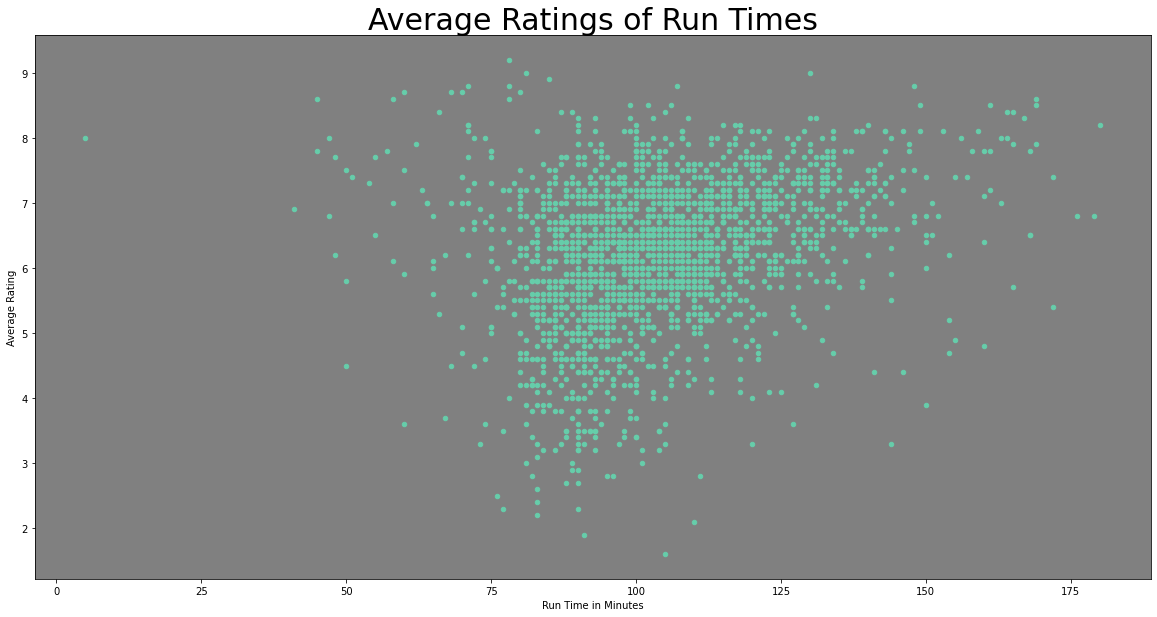

In [27]:
#correlation between run time and ratings plot
movies.plot(x='Run Time', y='Average Rating', kind='scatter', figsize=(20, 10), color='#66CDAA')
ax = plt.axes()
ax.set(facecolor='grey')
plt.title('Average Ratings of Run Times', fontsize=30)
plt.xlabel('Run Time in Minutes')
plt.show()

# Production Budget
Now that we have seen which genres rated the best, we can see how much the movies rating higher than a seven ended up costing to make in the last five years.

In [28]:
##Now starting analysis on production budget using years 2015-2020 and sorting by ratings above 7
lastfiveyearsbudgets = movies.loc[(movies['Release Date'] >= '2015-01-01') & (movies['Release Date'] <= '2020-12-31')]
lastfiveyearsbudgets = lastfiveyearsbudgets[lastfiveyearsbudgets['Average Rating'] >= 7]
lastfiveyearsbudgets = lastfiveyearsbudgets.sort_values('Production Budget', ascending=False)
lastfiveyearsbudgets = lastfiveyearsbudgets.drop_duplicates(subset=['Genres'])
lastfiveyearsbudgets.head()

,Release Date,Title,Production Budget,Domestic Gross,Worldwide Gross,Run Time,Genres,Average Rating,Number of Votes
3,2015-05-01,Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,141.0,"Action, Adventure, Sci-Fi",7.3,665594.0
11,2018-05-25,Solo: A Star Wars Story,275000000.0,213767512.0,3.931513e+08,135.0,"Action, Adventure, Fantasy",7.0,226243.0
56,2018-06-15,Incredibles 2,200000000.0,608581744.0,1.242521e+09,118.0,"Action, Adventure, Animation",7.7,203510.0
58,2016-06-17,Finding Dory,200000000.0,486295561.0,1.021215e+09,97.0,"Adventure, Animation, Comedy",7.3,213542.0
85,2015-04-03,Furious 7,190000000.0,353007020.0,1.518723e+09,137.0,"Action, Crime, Thriller",7.2,335074.0


In [29]:
lastfiveyearsbudgets.describe()

,Production Budget,Domestic Gross,Worldwide Gross,Run Time,Average Rating,Number of Votes
count,7.900000e+01,7.900000e+01,7.900000e+01,78.000000,79.000000,79.000000
mean,6.206456e+07,9.275366e+07,2.360099e+08,117.692308,7.475949,148348.518987
std,6.779121e+07,1.263817e+08,3.426026e+08,24.713059,0.430925,161541.793080
min,1.300000e+06,0.000000e+00,0.000000e+00,45.000000,7.000000,5.000000
25%,2.000000e+07,7.639089e+06,1.950183e+07,104.250000,7.200000,30568.000000
50%,4.000000e+07,4.082634e+07,9.689283e+07,118.000000,7.300000,90773.000000
75%,7.625000e+07,1.287464e+08,2.807985e+08,132.750000,7.700000,209391.000000
max,3.306000e+08,6.085817e+08,1.518723e+09,168.000000,9.000000,680116.000000


It would appear that to make a movie that has a rating of seven or higher, a company would potentially have an average budget consisting of 620,000,000 (six hundred twenty million) dollars. However, it should be noted that the standard deviation is very high for this data set, therefore indicating that more research is needed to provide a more accurate analysis.

<ipython-input-30-7c96771ff788>:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


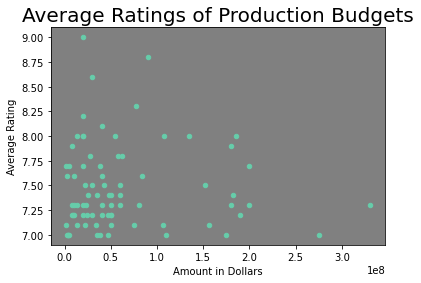

In [30]:
#now seeing what kind of relationship, if any exists, between budgets and ratings
#plotting with le8 being the standard scientific notion on y axis
lastfiveyearsbudgets.plot(x='Production Budget', y='Average Rating', kind='scatter', color='#66CDAA')
ax = plt.axes()
ax.set(facecolor='grey')
plt.title('Average Ratings of Production Budgets', fontsize=20)
plt.xlabel('Amount in Dollars')
plt.show()

The graph above indicates that the earlier analysis of six hundred twenty million as the average is not accurate and that the production budget for a rated seven or higher movie would most likely be under fifty million dollars.

# Domestic Gross
After viewing what would most likely be the budget for a seven or higher rated movie, we can take a look at what would be the profit for said movies domestically from what they were in the last five years.

In [31]:
##Now starting analysis on domestic gross using years 2015-2020 and sorting by ratings above 7
lastfiveyearsdomestic = movies.loc[(movies['Release Date'] >= '2015-01-01') & (movies['Release Date'] <= '2020-12-31')]
lastfiveyearsdomestic = lastfiveyearsdomestic[lastfiveyearsdomestic['Average Rating'] >= 7]
lastfiveyearsdomestic = lastfiveyearsdomestic.sort_values('Domestic Gross', ascending=False)
lastfiveyearsdomestic = lastfiveyearsdomestic.drop_duplicates(subset=['Genres'])
lastfiveyearsdomestic.head()

,Release Date,Title,Production Budget,Domestic Gross,Worldwide Gross,Run Time,Genres,Average Rating,Number of Votes
53,2018-02-16,Black Panther,200000000.0,700059566.0,1.348258e+09,134.0,"Action, Adventure, Sci-Fi",7.3,516148.0
56,2018-06-15,Incredibles 2,200000000.0,608581744.0,1.242521e+09,118.0,"Action, Adventure, Animation",7.7,203510.0
58,2016-06-17,Finding Dory,200000000.0,486295561.0,1.021215e+09,97.0,"Adventure, Animation, Comedy",7.3,213542.0
198,2017-06-02,Wonder Woman,150000000.0,412563408.0,8.211334e+08,141.0,"Action, Adventure, Fantasy",7.5,487527.0
624,2017-12-20,Jumanji: Welcome to the Jungle,90000000.0,404508916.0,9.644962e+08,119.0,"Action, Adventure, Comedy",7.0,242735.0


In [32]:
lastfiveyearsdomestic.describe()

,Production Budget,Domestic Gross,Worldwide Gross,Run Time,Average Rating,Number of Votes
count,7.900000e+01,7.900000e+01,7.900000e+01,78.000000,79.00000,79.000000
mean,5.252057e+07,1.088754e+08,2.644627e+08,115.500000,7.54557,163201.822785
std,5.630842e+07,1.423833e+08,3.439104e+08,24.723799,0.45876,165312.133315
min,1.250000e+05,0.000000e+00,0.000000e+00,45.000000,7.00000,6.000000
25%,1.300000e+07,8.514076e+06,2.378608e+07,102.250000,7.20000,31699.000000
50%,3.000000e+07,5.624508e+07,1.217783e+08,115.500000,7.40000,111632.000000
75%,6.850000e+07,1.603545e+08,3.076324e+08,131.500000,7.90000,251559.000000
max,2.000000e+08,7.000596e+08,1.518723e+09,168.000000,9.00000,680116.000000


On average in the last five years, according to the calculations, a company could expect to net a profit of around one hundred million dollars for a seven or higher rated movie domestically.

<ipython-input-33-43f0cc6d237a>:3: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


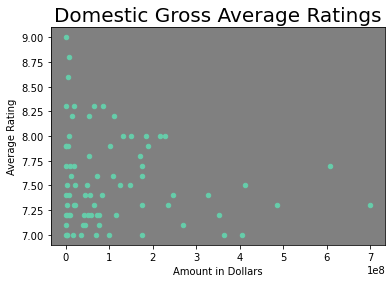

In [33]:
#plot domestic
lastfiveyearsdomestic.plot(x='Domestic Gross', y='Average Rating', kind='scatter', color='#66CDAA')
ax = plt.axes()
ax.set(facecolor='grey')
plt.title('Domestic Gross Average Ratings', fontsize=20)
plt.xlabel('Amount in Dollars')
plt.show()

# Worldwide Gross
Once again looking at the data from the last five years, we'll look at what the potential profit for a rated seven or higher movie may be, but this time on a global scale.

In [34]:
##Now starting analysis on worldwide gross using years 2015-2020 and sorting by ratings above 7
lastfiveyearsworld = movies.loc[(movies['Release Date'] >= '2015-01-01') & (movies['Release Date'] <= '2020-12-31')]
lastfiveyearsworld = lastfiveyearsworld[lastfiveyearsworld['Average Rating'] >= 7]
lastfiveyearsworld = lastfiveyearsworld.sort_values('Worldwide Gross', ascending=False)
lastfiveyearsworld = lastfiveyearsworld.drop_duplicates(subset=['Genres'])
lastfiveyearsworld.head()

,Release Date,Title,Production Budget,Domestic Gross,Worldwide Gross,Run Time,Genres,Average Rating,Number of Votes
6,2018-04-27,Avengers: Infinity War,300000000.0,678815482.0,2.048134e+09,149.0,"Action, Adventure, Sci-Fi",8.5,670926.0
85,2015-04-03,Furious 7,190000000.0,353007020.0,1.518723e+09,137.0,"Action, Crime, Thriller",7.2,335074.0
56,2018-06-15,Incredibles 2,200000000.0,608581744.0,1.242521e+09,118.0,"Action, Adventure, Animation",7.7,203510.0
178,2018-12-21,Aquaman,160000000.0,335061807.0,1.146895e+09,143.0,"Action, Adventure, Fantasy",7.1,263328.0
58,2016-06-17,Finding Dory,200000000.0,486295561.0,1.021215e+09,97.0,"Adventure, Animation, Comedy",7.3,213542.0


In [35]:
#discuss results of correlation between worldwide gross and ratings here
lastfiveyearsworld.describe()

,Production Budget,Domestic Gross,Worldwide Gross,Run Time,Average Rating,Number of Votes
count,7.900000e+01,7.900000e+01,7.900000e+01,78.000000,79.000000,79.000000
mean,5.588608e+07,1.072873e+08,2.819147e+08,117.012821,7.563291,163745.810127
std,6.257223e+07,1.395177e+08,3.857236e+08,25.421891,0.486531,162689.383332
min,1.300000e+06,0.000000e+00,0.000000e+00,45.000000,7.000000,6.000000
25%,1.300000e+07,8.514076e+06,2.745013e+07,102.250000,7.200000,31935.000000
50%,3.000000e+07,5.451374e+07,1.355692e+08,115.500000,7.400000,116433.000000
75%,7.625000e+07,1.603545e+08,3.076324e+08,132.000000,7.900000,251559.000000
max,3.000000e+08,6.788155e+08,2.048134e+09,168.000000,9.000000,680116.000000


Indicated from the chart , it would seem that on average the worldwide profit for a seven and higher rated movie would be around 280,000,000 (two hundred eighty million) dollars, but once more the standard deviation is high. Therefore, we can infer that a larger dataset is most likely needed to get a more accurate indication on how much a movie may make on a global scale.

<ipython-input-36-4976f0df49b0>:3: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


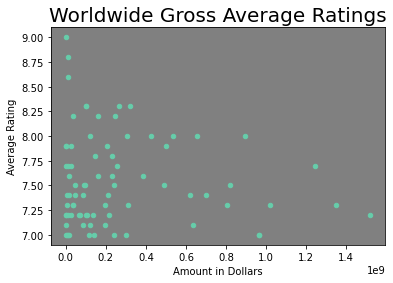

In [36]:
#plot worldwide
lastfiveyearsdomestic.plot(x='Worldwide Gross', y='Average Rating', kind='scatter', color='#66CDAA')
ax = plt.axes()
ax.set(facecolor='grey')
plt.title('Worldwide Gross Average Ratings', fontsize=20)
plt.xlabel('Amount in Dollars')
plt.show()

Plotting the worldwide profits from the last five years does seem to suggest the average is not accurate and that most likely profit would be under twenty million dollars.